In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re
from utilities import *
from utilities_train import *

/Users/huayinluo/Documents/code/gapjncsegmentation/gapvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# get all image and mask paths
data_dir = "/Volumes/LaCie/dauer_data_128"
image_paths = []
mask_paths = []
pattern = r"(^|.*/)\d+\.npy$"
for root, dirs, files in os.walk(os.path.join(data_dir, "original")):
    for file in files:
        if re.match(pattern, file):
            image_paths.append(os.path.join(root, file))
for root, dirs, files in os.walk(os.path.join(data_dir, "ground_truth")):
    for file in files:
        if re.match(pattern, file):
            mask_paths.append(os.path.join(root, file))
print("Found {} images and {} masks".format(len(image_paths), len(mask_paths)))

Found 43120 images and 43120 masks


In [13]:
cutoff = 0.001
selected_image_paths = []
selected_mask_paths = []
for i in range(len(mask_paths)):
    print("Progress: {:.2f}%".format(i / len(mask_paths) * 100), end="\r")
    img = np.load(image_paths[i])
    mask = np.load(mask_paths[i])
    unique, counts = np.unique(mask, return_counts=True)
    try:
        percentage_gj = counts[1] / np.sum(counts)
    except:
        percentage_gj = 0
        continue
    if percentage_gj > cutoff:
        selected_image_paths.append(image_paths[i])
        selected_mask_paths.append(mask_paths[i])
print("Selected {} images and masks with gj percentage > {}".format(len(selected_image_paths), cutoff))

Selected 10638 images and masks with gj percentage > 0.001


[  0 255] [48891   261]


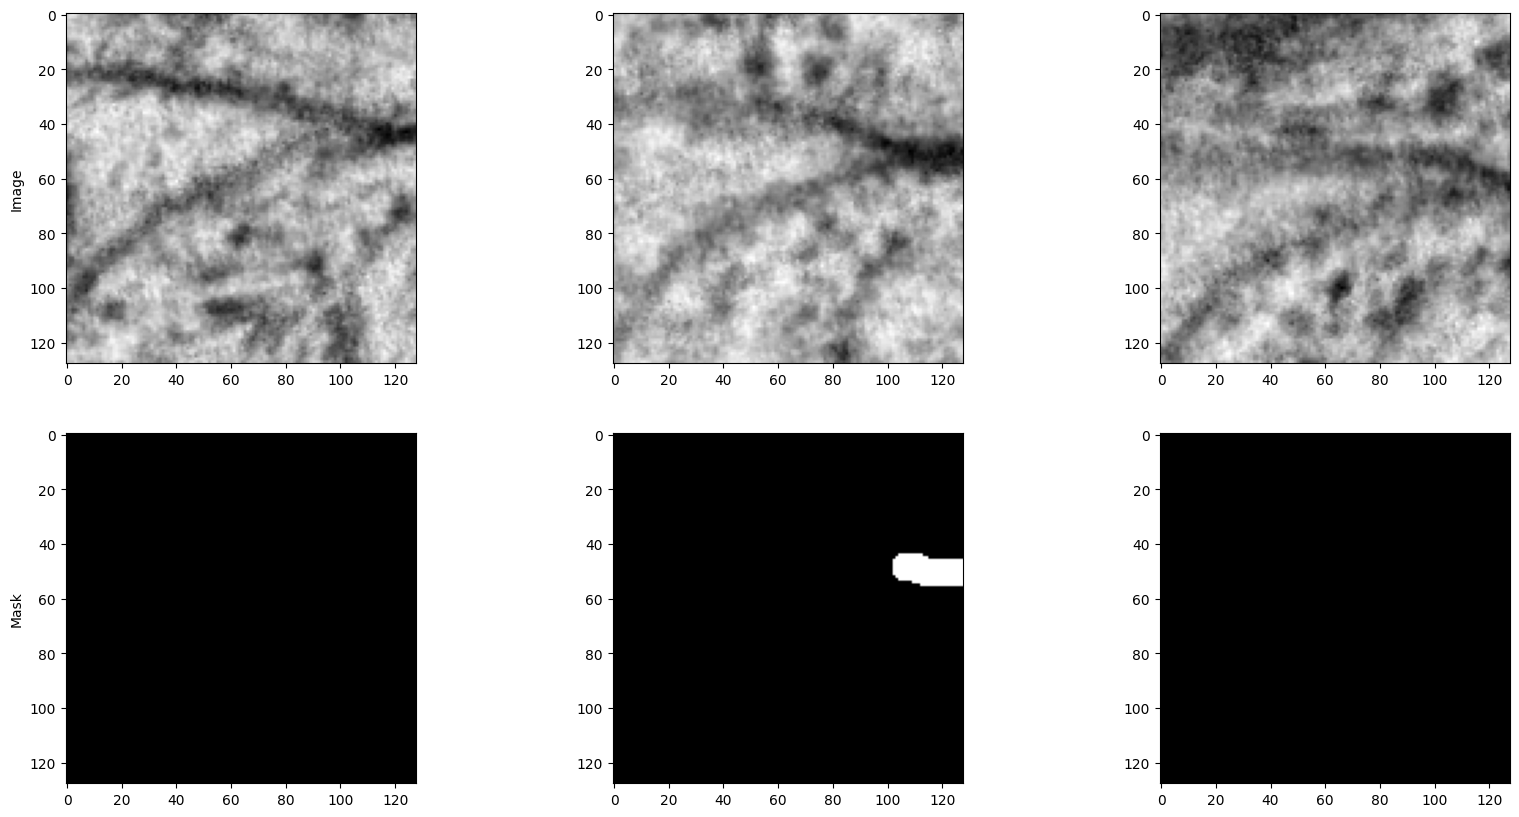

In [14]:
from utilities import *
k = 13
img = np.load(selected_image_paths[k])
mask = np.load(selected_mask_paths[k])
unique, counts = np.unique(mask, return_counts=True)
print(unique, counts)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
visualize_3d_slice(img, ax[0], "Image")
visualize_3d_slice(mask, ax[1], "Mask")

In [15]:
# train test split
split = len(selected_image_paths) * 0.8
train_image_paths = selected_image_paths[:int(split)]
train_mask_paths = selected_mask_paths[:int(split)]
test_image_paths = selected_image_paths[int(split):]
test_mask_paths = selected_mask_paths[int(split):]
print("Train: {} images and {} masks".format(len(train_image_paths), len(train_mask_paths)))
print("Test: {} images and {} masks".format(len(test_image_paths), len(test_mask_paths)))

Train: 8510 images and 8510 masks
Test: 2128 images and 2128 masks


In [7]:
save_data_dir = "/Volumes/LaCie/select_dauer_data_128"
if not os.path.exists(save_data_dir):
    os.makedirs(save_data_dir)
create_train_valid_test_dir(save_data_dir)

In [8]:
for i in range(len(train_image_paths)):
    img = np.load(train_image_paths[i])
    mask = np.load(train_mask_paths[i])
    np.save(os.path.join(save_data_dir, "original", "train", "{}.npy".format(i)), img)
    np.save(os.path.join(save_data_dir, "ground_truth", "train", "{}.npy".format(i)), mask)
    print("train save progress {:.2f}%".format((i+1)/len(train_image_paths)*100), end="\r")

for i in range(len(test_image_paths)):
    img = np.load(test_image_paths[i])
    mask = np.load(test_mask_paths[i])
    np.save(os.path.join(save_data_dir, "original", "test", "{}.npy".format(i)), img)
    np.save(os.path.join(save_data_dir, "ground_truth", "test", "{}.npy".format(i)), mask)
    print("test save progress {:.2f}%".format((i+1)/len(test_image_paths)*100), end="\r")
    

# overfit

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re
from utilities import *
from utilities_train import *
save_data_dir = "data/one_64"
if not os.path.exists(save_data_dir):
    os.makedirs(save_data_dir)
create_train_valid_test_dir(save_data_dir)

/Users/huayinluo/Documents/code/gapjncsegmentation/gapvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# get all image and mask paths
data_dir = "data/tiniest_data_64"
image_paths = []
mask_paths = []
pattern = r"(^|.*/)\d+\.npy$"
for root, dirs, files in os.walk(os.path.join(data_dir, "original")):
    for file in files:
        if re.match(pattern, file):
            image_paths.append(os.path.join(root, file))
for root, dirs, files in os.walk(os.path.join(data_dir, "ground_truth")):
    for file in files:
        if re.match(pattern, file):
            mask_paths.append(os.path.join(root, file))
print("Found {} images and {} masks".format(len(image_paths), len(mask_paths)))
cutoff = 0.002
selected_image_paths = []
selected_mask_paths = []
for i in range(len(mask_paths)):
    img = np.load(image_paths[i])
    mask = np.load(mask_paths[i])
    depth, height, width = mask.shape
    total_pixels = depth * height * width
    num_ones = np.sum(mask[1])
    percentage_gj = num_ones / total_pixels
    if percentage_gj > cutoff:
        selected_image_paths.append(image_paths[i])
        selected_mask_paths.append(mask_paths[i])
    print("Progress: {:.2f}%".format((i+1)/len(mask_paths)*100), end="\r")
print("Selected {} images and masks with gj percentage > {}".format(len(selected_image_paths), cutoff))

Found 32 images and 32 masks
Selected 2 images and masks with gj percentage > 0.002


In [6]:
num_train = 1
num_test = 1
train_image_paths = selected_image_paths[:num_train]
train_mask_paths = selected_mask_paths[:num_train]
test_image_paths = selected_image_paths[num_train:num_train+num_test]
test_mask_paths = selected_mask_paths[num_train:num_train+num_test]
for i in range(len(train_image_paths)):
    img = np.load(train_image_paths[i])
    mask = np.load(train_mask_paths[i])
    np.save(os.path.join(save_data_dir, "original", "train", "{}.npy".format(i)), img)
    np.save(os.path.join(save_data_dir, "ground_truth", "train", "{}.npy".format(i)), mask)
    print("train save progress {:.2f}%".format((i+1)/len(train_image_paths)*100), end="\r")

print("finished train save")
for i in range(len(test_image_paths)):
    img = np.load(test_image_paths[i])
    mask = np.load(test_mask_paths[i])
    np.save(os.path.join(save_data_dir, "original", "test", "{}.npy".format(i)), img)
    np.save(os.path.join(save_data_dir, "ground_truth", "test", "{}.npy".format(i)), mask)
    print("test save progress {:.2f}%".format((i+1)/len(test_image_paths)*100), end="\r")
    

finished train save 100.00%


percentage_gj: 0.021630859375


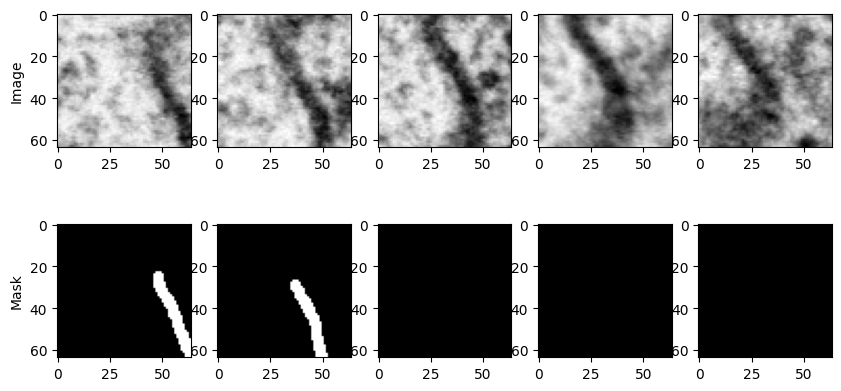

In [7]:
from utilities import *
for i in range(len(train_image_paths)):
    img = np.load(train_image_paths[i])
    mask = np.load(train_mask_paths[i])
    unique, counts = np.unique(mask, return_counts=True)
    percentage_gj = counts[1] / np.sum(counts)
    print("percentage_gj: {}".format(percentage_gj))
    fig, ax = plt.subplots(2, 5, figsize=(10, 5))
    visualize_3d_slice(img, ax[0], "Image")
    visualize_3d_slice(mask, ax[1], "Mask")
    plt.show()

percentage_gj: 0.0037811279296875


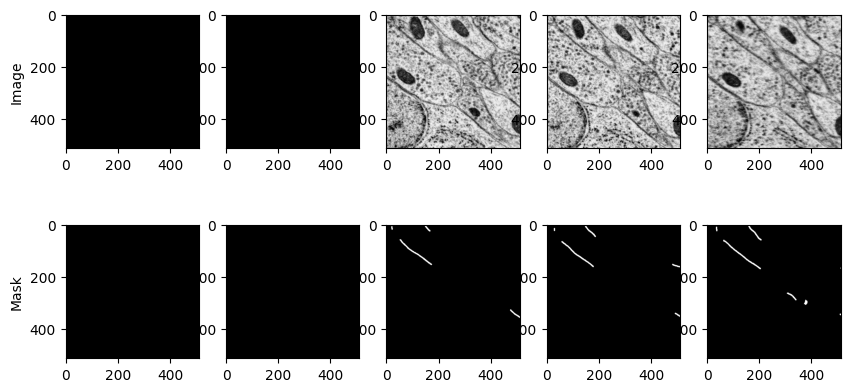

In [32]:
for i in range(len(test_image_paths)):
    img = np.load(test_image_paths[i])
    mask = np.load(test_mask_paths[i])
    unique, counts = np.unique(mask, return_counts=True)
    percentage_gj = counts[1] / np.sum(counts)
    print("percentage_gj: {}".format(percentage_gj))
    fig, ax = plt.subplots(2, 5, figsize=(10, 5))
    visualize_3d_slice(img, ax[0], "Image")
    visualize_3d_slice(mask, ax[1], "Mask")
    plt.show()